In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
i

In [4]:
df = pd.read_csv('selected_features_without_text.csv')
embeddings = pd.read_csv('embeddings.csv')

In [7]:
df = pd.merge(df, embeddings, on='reviewID', how='inner')


In [8]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [9]:
df['reviewRating_1'] = df['reviewRating_1'].astype(int)
df['reviewRating_2'] = df['reviewRating_2'].astype(int)
df['reviewRating_3'] = df['reviewRating_3'].astype(int)
df['reviewRating_4'] = df['reviewRating_4'].astype(int)
df['reviewRating_5'] = df['reviewRating_5'].astype(int)

In [18]:
df['embedding'] = df['embedding'].apply(ast.literal_eval)

In [42]:
embedding_columns = pd.DataFrame(df['embedding'].to_list(), columns=[f'embedding_{i}' for i in range(768)])

In [43]:
X = df.drop(['flagged','embedding'], axis=1) 
y = df.flagged

In [44]:
X = pd.concat([X, embedding_columns], axis=1)

In [45]:
X

,reviewerID,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,bNYesZ944s6IJVowOnB0iA,0.002337,0.018008,0.001885,841,4.5,0.415838,0.446875,0.427350,1.391395e-01,...,-0.346646,-0.020995,0.101202,-0.072782,-0.153681,-0.257142,0.065339,0.164680,0.216101,0.161352
1,TRKxLC3y-ZvP45e5iilMtw,0.000000,0.001149,0.000000,841,4.5,0.183244,0.031250,0.068376,4.666667e-01,...,-0.100345,-0.135662,0.101436,-0.291421,-0.084117,-0.016055,0.055459,0.070562,0.110858,0.140647
2,0EMm8umAqXZzyhxNpL4M9g,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,4.133333e-01,...,-0.032257,-0.195637,0.033009,-0.357601,-0.127898,-0.063501,0.012857,-0.089491,0.114655,0.255965
3,DlwexC7z88ymAzu45skODw,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,1.205482e-01,...,-0.271803,-0.148201,0.070824,-0.183742,-0.148627,-0.293858,0.068862,0.041990,0.148788,0.085762
4,kW2dk1CWihmh3g7k9N2G8A,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,1.674603e-01,...,-0.175488,-0.155962,0.075905,-0.204652,-0.126759,-0.059733,0.045032,-0.027244,0.179802,0.089827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26584,tivh8lr6pzBDNfrJLYWh_g,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,2.266234e-01,...,-0.401634,-0.149763,0.002567,-0.311448,-0.164592,0.033955,-0.034833,0.039568,0.168914,0.158517
26585,jKs4FQgkV0wSX8BG2_dgTg,0.001275,0.003831,0.000322,15,4.0,0.598317,0.053125,0.076923,2.692708e-01,...,-0.347059,-0.306652,0.156991,-0.146208,0.024675,-0.112160,-0.142495,0.118314,0.157822,0.019326
26586,vX6aOMQ3HWCbwZVfCkCauw,0.002762,0.018391,0.002667,16,4.0,0.008416,0.025000,0.042735,-1.190476e-01,...,-0.409674,-0.142150,-0.110172,-0.229304,-0.148320,0.120911,-0.039800,0.115554,0.230058,-0.102864
26587,vX6aOMQ3HWCbwZVfCkCauw,0.002762,0.018391,0.002667,17,4.0,0.588753,0.037500,0.042735,6.938894e-18,...,-0.453053,-0.271859,-0.082150,-0.113309,-0.088408,-0.125548,0.043753,0.098892,0.252293,0.047042


In [46]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [47]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [48]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [49]:
X_train

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,0.002337,0.018008,0.001885,841,4.5,0.415838,0.446875,0.427350,1.391395e-01,0.528655,...,-0.346646,-0.020995,0.101202,-0.072782,-0.153681,-0.257142,0.065339,0.164680,0.216101,0.161352
2,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,4.133333e-01,0.720000,...,-0.032257,-0.195637,0.033009,-0.357601,-0.127898,-0.063501,0.012857,-0.089491,0.114655,0.255965
3,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,1.205482e-01,0.535201,...,-0.271803,-0.148201,0.070824,-0.183742,-0.148627,-0.293858,0.068862,0.041990,0.148788,0.085762
4,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,1.674603e-01,0.564683,...,-0.175488,-0.155962,0.075905,-0.204652,-0.126759,-0.059733,0.045032,-0.027244,0.179802,0.089827
5,0.012537,0.020307,0.003127,841,4.5,0.430375,0.234375,0.324786,1.778007e-01,0.458819,...,-0.299058,-0.111515,0.083883,-0.239529,-0.110814,-0.163339,0.035876,-0.001848,0.126263,0.090091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26583,0.011475,0.011111,0.001150,13,4.5,0.247896,0.106250,0.213675,2.019913e-01,0.659586,...,-0.251377,-0.068806,0.087334,-0.259217,-0.170646,-0.198758,0.077391,0.100914,0.284760,0.003290
26584,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,2.266234e-01,0.760173,...,-0.401634,-0.149763,0.002567,-0.311448,-0.164592,0.033955,-0.034833,0.039568,0.168914,0.158517
26586,0.002762,0.018391,0.002667,16,4.0,0.008416,0.025000,0.042735,-1.190476e-01,0.588095,...,-0.409674,-0.142150,-0.110172,-0.229304,-0.148320,0.120911,-0.039800,0.115554,0.230058,-0.102864
26587,0.002762,0.018391,0.002667,17,4.0,0.588753,0.037500,0.042735,6.938894e-18,0.658333,...,-0.453053,-0.271859,-0.082150,-0.113309,-0.088408,-0.125548,0.043753,0.098892,0.252293,0.047042


In [50]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/100
666/666 [==============================] - 1s 2ms/step - loss: 0.5546 - recall: 0.1535 - val_loss: 0.4642 - val_recall: 0.2845
Epoch 2/100
666/666 [==============================] - 1s 1ms/step - loss: 0.4661 - recall: 0.2591 - val_loss: 0.4548 - val_recall: 0.4060
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4549 - recall: 0.3039 - val_loss: 0.4300 - val_recall: 0.2563
Epoch 4/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4311 - recall: 0.3223 - val_loss: 0.4656 - val_recall: 0.1050
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4263 - recall: 0.3476 - val_loss: 0.4920 - val_recall: 0.0995
Epoch 6/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4111 - recall: 0.3720 - val_loss: 0.4305 - val_recall: 0.1850
Epoch 7/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4104 - recall: 0.3842 - val_loss: 0.4433 - val_recall: 0.5948
Epoch 8/100
666/666 [======

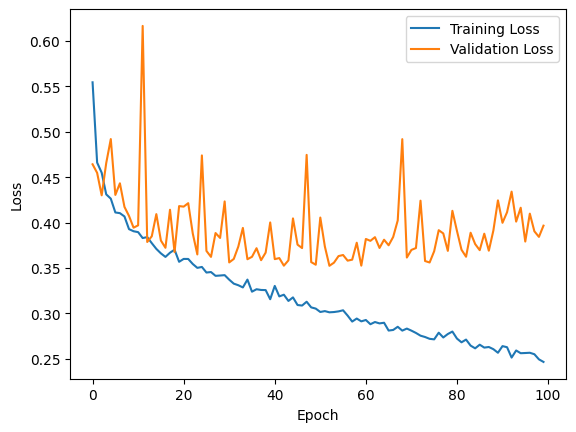

In [51]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/40
333/333 [==============================] - 1s 2ms/step - loss: 0.5681 - recall: 0.1432 - val_loss: 0.4889 - val_recall: 0.3715
Epoch 2/40
333/333 [==============================] - 1s 3ms/step - loss: 0.4699 - recall: 0.2305 - val_loss: 0.4513 - val_recall: 0.2618
Epoch 3/40
333/333 [==============================] - 16s 49ms/step - loss: 0.4720 - recall: 0.2814 - val_loss: 0.4392 - val_recall: 0.3119
Epoch 4/40
333/333 [==============================] - 1s 2ms/step - loss: 0.4501 - recall: 0.3010 - val_loss: 0.4652 - val_recall: 0.1042
Epoch 5/40
333/333 [==============================] - 1s 2ms/step - loss: 0.4372 - recall: 0.3148 - val_loss: 0.4493 - val_recall: 0.4961
Epoch 6/40
333/333 [==============================] - 1s 2ms/step - loss: 0.4285 - recall: 0.3340 - val_loss: 0.4428 - val_recall: 0.1944
Epoch 7/40
333/333 [==============================] - 1s 2ms/step - loss: 0.4185 - recall: 0.3414 - val_loss: 0.4090 - val_recall: 0.3636
Epoch 8/40
333/333 [============

166/166 [==============================] - 0s 870us/step


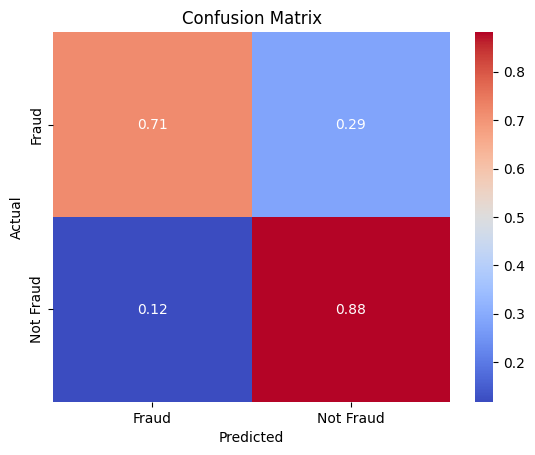

Confusion Matrix:
[[0.71471247 0.28528753]
 [0.11833856 0.88166144]]
Accuracy: 0.7549593803136218
Precision: 0.4953764861294584
Recall: 0.8816614420062696
F1-Score: 0.6343388779250071


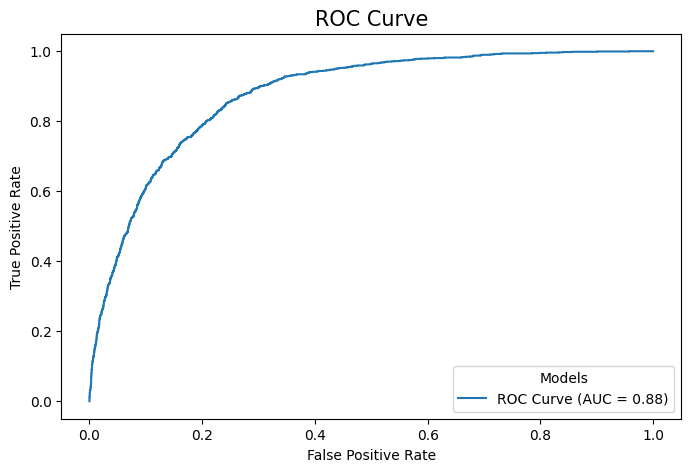

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.10).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_test_binary = (y_test > 0.10).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary,normalize = 'true')
sns.heatmap(conf_matrix,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
auc = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.show()
